In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("D:/JUPYTER NOTEBOOK/100 DAYS OF Machine Learning/covid_toy.csv")

In [89]:
df.head(5)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [90]:
df.shape

(100, 6)

In [91]:
df.sample(5)

,age,gender,fever,cough,city,has_covid
93,27,Male,100.0,Mild,Kolkata,Yes
66,51,Male,104.0,Mild,Kolkata,No
45,72,Male,99.0,Mild,Bangalore,No
83,17,Female,104.0,Mild,Kolkata,No
77,8,Female,101.0,Mild,Kolkata,No


In [92]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [93]:
df.describe()

,age,fever
count,100.000000,90.000000
mean,44.220000,100.844444
std,24.878931,2.054926
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,101.000000
75%,66.500000,102.750000
max,84.000000,104.000000


In [94]:
df.corr(numeric_only=True)

,age,fever
age,1.000000,-0.017828
fever,-0.017828,1.000000


<Axes: xlabel='age', ylabel='gender'>

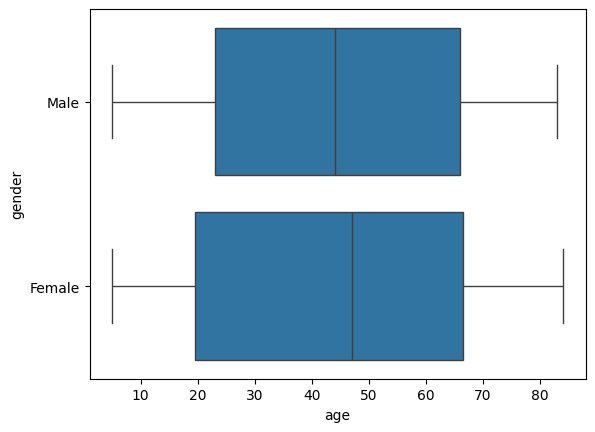

In [95]:
sns.boxplot(x=df['age'],y=df['gender'])

<Axes: >

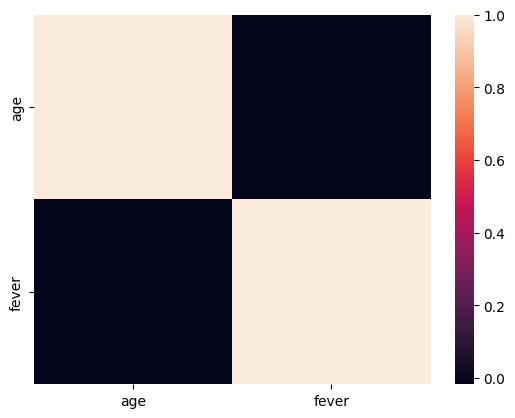

In [96]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='gender', ylabel='count'>

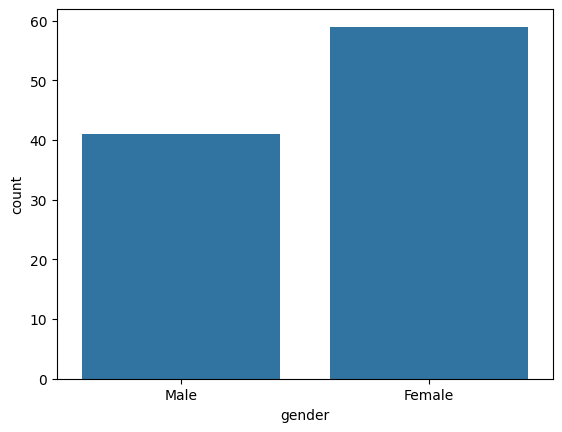

In [97]:
sns.countplot(x=df['gender'])

<Axes: xlabel='cough', ylabel='count'>

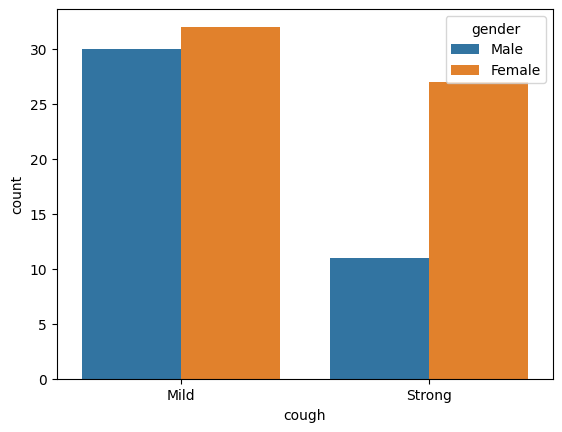

In [98]:
sns.countplot(x=df['cough'],hue=df['gender'])

<Axes: xlabel='age', ylabel='fever'>

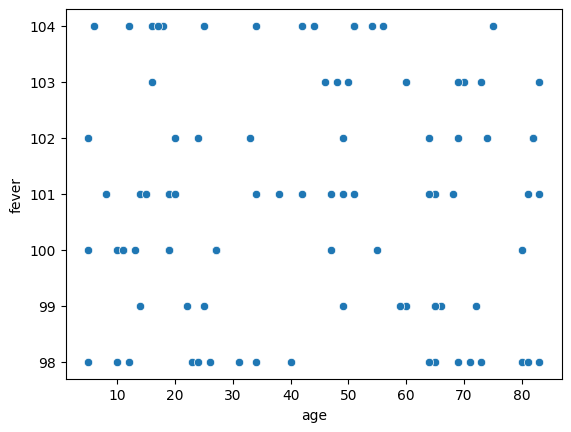

In [99]:
sns.scatterplot(x=df['age'],y=df['fever'])

In [100]:
df.head(1)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['has_covid'],axis=1),df['has_covid'],test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((80, 5), (20, 5))

In [103]:
from sklearn.impute import SimpleImputer

In [104]:
# fever
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])
X_test_fever = si.transform(X_test[['fever']])

In [105]:
X_train_fever.shape,X_train_fever.shape

((80, 1), (80, 1))

In [106]:
#gender
from sklearn.preprocessing import OneHotEncoder

In [107]:
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_gender = ohe.fit_transform(X_train[['gender']])
X_test_gender = ohe.transform(X_test[['gender']])

In [108]:
#City
X_train_city = ohe.fit_transform(X_train[['city']])
X_test_city = ohe.transform(X_test[['city']])

In [109]:
X_train_city.shape

(80, 3)

In [110]:
from sklearn.preprocessing import OrdinalEncoder

In [113]:
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']]) 
X_test_cough = oe.transform(X_test[['cough']]) 

In [117]:
X_train_age = X_train[['age']]
X_test_age = X_test[['age']]

In [125]:
X_train_transformed = np.concatenate((X_train_age,X_train_gender,X_train_fever,X_train_cough,X_train_city),axis=1)
X_test_transformed = np.concatenate((X_test_age,X_test_gender,X_test_fever,X_test_cough,X_test_city),axis=1)

In [129]:
X_train_transformed

array([[ 81.,   0., 101.,   0.,   0.,   0.,   1.],
       [  5.,   0., 100.,   0.,   0.,   1.,   0.],
       [ 19.,   0., 100.,   0.,   0.,   1.,   0.],
       [ 27.,   1., 100.,   0.,   1.,   0.,   0.],
       [ 73.,   0., 103.,   0.,   1.,   0.,   0.],
       [ 70.,   1., 103.,   1.,   0.,   1.,   0.],
       [ 49.,   0., 102.,   0.,   1.,   0.,   0.],
       [ 51.,   0., 101.,   1.,   0.,   1.,   0.],
       [ 64.,   0., 101.,   0.,   1.,   0.,   0.],
       [ 83.,   0., 101.,   0.,   0.,   1.,   0.],
       [ 65.,   0.,  98.,   0.,   0.,   0.,   1.],
       [ 18.,   0., 104.,   0.,   0.,   0.,   0.],
       [ 16.,   0., 103.,   0.,   0.,   0.,   0.],
       [ 16.,   1., 104.,   0.,   0.,   1.,   0.],
       [ 27.,   1., 100.,   0.,   0.,   1.,   0.],
       [ 84.,   0., 101.,   0.,   0.,   0.,   0.],
       [ 51.,   1., 104.,   0.,   0.,   1.,   0.],
       [ 69.,   0., 102.,   0.,   0.,   0.,   0.],
       [ 82.,   0., 102.,   1.,   0.,   0.,   0.],
       [ 69.,   0., 103.,   0.,

In [132]:
X_test_transformed

array([[ 17.,   0., 104.,   0.,   0.,   1.,   0.],
       [ 83.,   1.,  98.,   0.,   1.,   0.,   0.],
       [ 68.,   0., 101.,   1.,   1.,   0.,   0.],
       [ 72.,   1.,  99.,   0.,   0.,   0.,   0.],
       [ 20.,   1., 102.,   1.,   1.,   0.,   0.],
       [ 50.,   0., 103.,   0.,   0.,   1.,   0.],
       [ 71.,   0.,  98.,   1.,   0.,   1.,   0.],
       [ 14.,   0.,  99.,   0.,   0.,   0.,   1.],
       [ 75.,   0., 101.,   0.,   1.,   0.,   0.],
       [ 60.,   1., 103.,   0.,   0.,   1.,   0.],
       [ 64.,   0.,  98.,   0.,   0.,   0.,   0.],
       [ 15.,   1., 101.,   0.,   1.,   0.,   0.],
       [ 34.,   1.,  98.,   1.,   0.,   1.,   0.],
       [ 26.,   0.,  98.,   0.,   0.,   1.,   0.],
       [ 59.,   0.,  99.,   1.,   1.,   0.,   0.],
       [ 65.,   0., 101.,   0.,   0.,   0.,   1.],
       [ 80.,   1., 100.,   0.,   0.,   0.,   0.],
       [  8.,   0., 101.,   0.,   0.,   1.,   0.],
       [ 25.,   0.,  99.,   1.,   0.,   1.,   0.],
       [ 83.,   1., 103.,   0.,

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
sd = StandardScaler()

X_train_scaled = sd.fit_transform(X_train_transformed)
X_test_scaled = sd.transform(X_test_transformed)


In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test= le.transform(y_test)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr = LogisticRegression()

lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [142]:
y_pred = lr.predict(X_test_scaled)

In [143]:
from sklearn.metrics import accuracy_score

In [145]:
print(accuracy_score(y_test,y_pred))

0.45


In [146]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [147]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])